# Health care: Data set on Heart attack possibility
https://www.kaggle.com/nareshbhat/health-care-data-set-on-heart-attack-possibility

In [1]:
import pandas as pd
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,f1_score
from pandas.api.types import is_string_dtype,is_numeric_dtype
import seaborn as sns
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [2]:
%pwd

'D:\\Information system\\Sem 1\\Info 6105\\Assignment 3'

In [3]:
df = pd.read_csv(r'D:\\Information system\\Sem 1\\Info 6105\\Assignment 3\\heart.csv')

In [4]:
from sklearn.utils import shuffle
df = shuffle(df)

In [5]:
cols = list(df.columns)

<AxesSubplot:xlabel='Feature', ylabel='Percent missing'>

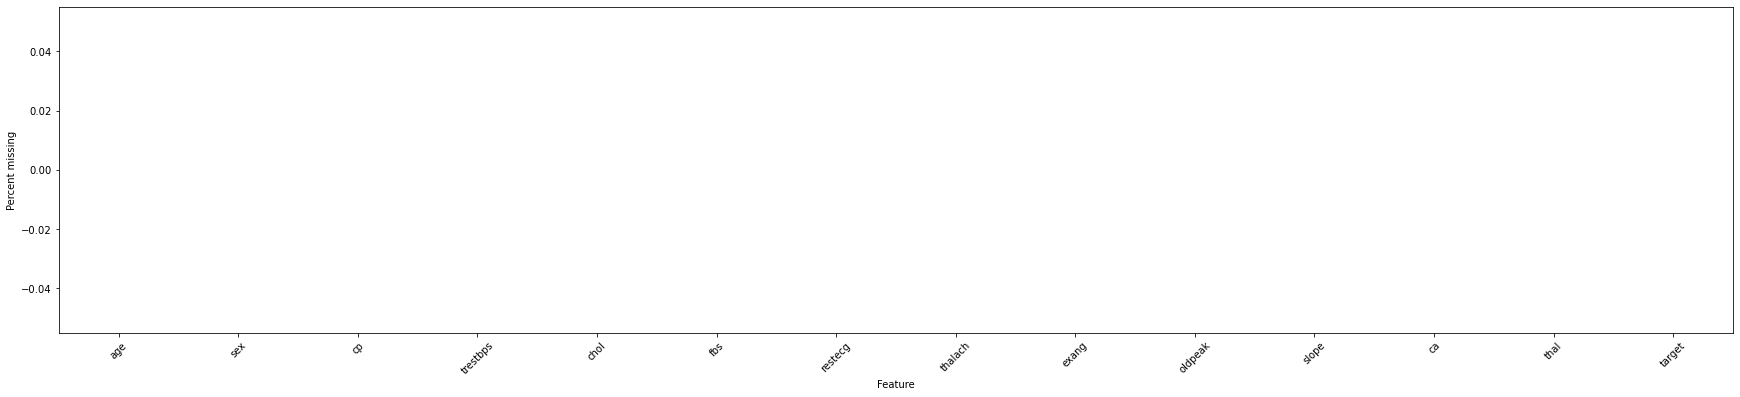

In [6]:
null_vals = df.isnull().sum()/len(df)*100
null_vals = pd.DataFrame(null_vals)
null_vals.reset_index(inplace = True)
null_vals.columns = ["Feature","Percent missing"]
plt.figure(figsize = (30,6))
plt.xticks(rotation=45)
sns.barplot(x = "Feature",y ="Percent missing",data = null_vals)

In [7]:
#Checking the sum of null values for each values
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Preprocessing the Data

In [8]:
def split_df(df,num):
    return df[ :num].copy(),df[num: ].copy()

In [9]:
#target is the value to be calculated
x = df.drop('target', axis=1)
y = df['target']
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [10]:
# spliting the data to for training and validation data set
x_trn,x_val = split_df(x,200)
y_trn,y_val = split_df(y,200)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

(200, 13) (103, 13) (200,) (103,)


# 1. Train an RF model

In [11]:
model = RandomForestClassifier(n_jobs = -1, n_estimators = 5,bootstrap = True)
model.fit(x_trn,y_trn)

RandomForestClassifier(n_estimators=5, n_jobs=-1)

In [12]:
y_prd = model.predict(x_val)
accuracy_score(y_val,y_prd)

0.7669902912621359

# 2. Train DNN Model

In [13]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x)
X_sc = pd.DataFrame(scaler.transform(x))
print(X_sc.shape)
X_sc.head(2)

(303, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.033002,-1.468418,0.032031,-0.092738,-0.237008,-0.417635,-1.005832,1.108705,-0.696631,-0.379244,-0.649113,-0.714429,-0.512922
1,0.400752,0.681005,-0.938515,-0.206964,0.246129,-0.417635,-1.005832,-0.859167,1.435481,1.691225,-0.649113,1.244593,1.123029


In [14]:
xd_trn,xd_val = split_df(X_sc,200)
yd_trn,yd_val = split_df(y,200)
print(xd_trn.shape,xd_val.shape,yd_trn.shape,yd_val.shape)

(200, 13) (103, 13) (200,) (103,)


In [15]:
xd_val.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
200,-0.260980,0.681005,1.002577,2.306004,-0.913400,2.394438,0.898962,0.540209,-0.696631,-0.465514,0.976352,-0.714429,1.123029
201,0.290464,0.681005,-0.938515,0.021488,-0.758796,-0.417635,0.898962,0.802592,1.435481,-0.896862,0.976352,-0.714429,1.123029
202,-1.033002,-1.468418,0.032031,-1.120770,-1.667094,-0.417635,0.898962,-0.509323,-0.696631,-0.896862,-0.649113,-0.714429,-0.512922
203,0.841908,0.681005,0.032031,-0.663867,0.671289,-0.417635,-1.005832,-2.039891,-0.696631,0.310912,-0.649113,0.265082,1.123029
204,-0.260980,0.681005,1.973123,-0.778093,-1.164631,-0.417635,-1.005832,1.764663,-0.696631,-0.896862,-0.649113,-0.714429,-2.148873


In [16]:
# Build the deep neural network
DL_model = Sequential()
DL_model.add(Dense(10, kernel_initializer="glorot_uniform",input_dim=13, activation='relu'))
DL_model.add(Dense(6, kernel_initializer="random_normal",activation='relu'))
DL_model.add(Dense(1, kernel_initializer="glorot_uniform",activation='sigmoid'))

In [17]:
DL_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
DL_model_gr= DL_model.fit(xd_trn, yd_trn, validation_data=(xd_val, yd_val), epochs=100, batch_size=5)

Epoch 1/100
40/40 [==============================] - 1s 11ms/step - loss: 0.6636 - accuracy: 0.6058 - val_loss: 0.6195 - val_accuracy: 0.6893
Epoch 2/100
40/40 [==============================] - 0s 4ms/step - loss: 0.6076 - accuracy: 0.7012 - val_loss: 0.5769 - val_accuracy: 0.7573
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5539 - accuracy: 0.7867 - val_loss: 0.5365 - val_accuracy: 0.7864
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5029 - accuracy: 0.8264 - val_loss: 0.5018 - val_accuracy: 0.7961
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4769 - accuracy: 0.7988 - val_loss: 0.4794 - val_accuracy: 0.8058
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4058 - accuracy: 0.8562 - val_loss: 0.4659 - val_accuracy: 0.7961
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.7858 - val_loss: 0.4611 - val_accuracy: 0.7961
Epoch 8/100


Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1632 - accuracy: 0.9441 - val_loss: 0.6387 - val_accuracy: 0.8155
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1522 - accuracy: 0.9331 - val_loss: 0.6388 - val_accuracy: 0.8155
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1492 - accuracy: 0.9448 - val_loss: 0.6442 - val_accuracy: 0.8155
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1649 - accuracy: 0.9505 - val_loss: 0.6426 - val_accuracy: 0.8155
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1391 - accuracy: 0.9448 - val_loss: 0.6507 - val_accuracy: 0.8155
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1715 - accuracy: 0.9276 - val_loss: 0.6511 - val_accuracy: 0.8155
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.1410 - accuracy: 0.9526 - val_loss: 0.6557 - val_accuracy: 0.8155
Epoch 

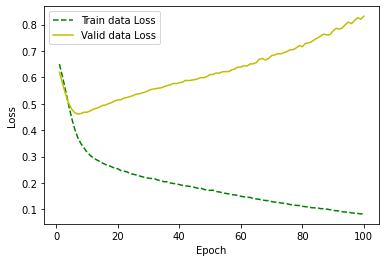

In [19]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = DL_model_gr.history['loss']
test_loss = DL_model_gr.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Train data Loss', 'Valid data Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

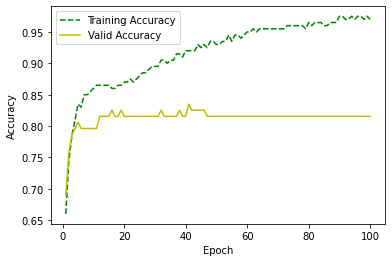

In [20]:
# Get training and test loss histories
training_loss = DL_model_gr.history['accuracy']
test_loss = DL_model_gr.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [21]:
# Evaluate the model
scores = DL_model.evaluate(xd_val, yd_val)
print ("Accuracy: %.2f%%" %(scores[1]*100))

4/4 [==============================] - 0s 1ms/step - loss: 0.8314 - accuracy: 0.8155
Accuracy: 81.55%


# (3) Hybrid DNN and RF model

To create a  hybrid DNN and RF model I will use Random Forest model to train the data and apply Feature importance to the data trained by RF and apply the coloumns with most feature importance to the DNN model. So by using this method I will have model which is a Hybrid of both RF and DNN.

In [22]:
df_hy = pd.read_csv(r'D:\\Information system\\Sem 1\\Info 6105\\Assignment 3\\heart.csv')

In [23]:
from sklearn.utils import shuffle
df_hy = shuffle(df_hy)

In [24]:
#target is the value to be calculated
x = df.drop('target', axis=1)
y = df['target']
print(x.shape)
print(y.shape)

(303, 13)
(303,)


In [25]:
# spliting the data to for training and validation data set
x_trn,x_val = split_df(x,200)
y_trn,y_val = split_df(y,200)
print(x_trn.shape,x_val.shape,y_trn.shape,y_val.shape)

(200, 13) (103, 13) (200,) (103,)


In [26]:
model_hyb = RandomForestClassifier(n_jobs = -1, n_estimators = 5,bootstrap = True)
model_hyb.fit(x_trn,y_trn)

RandomForestClassifier(n_estimators=5, n_jobs=-1)

In [27]:
y_prdh = model_hyb.predict(x_val)
accuracy_score(y_val,y_prd)

0.7669902912621359

<AxesSubplot:xlabel='Importance Score', ylabel='Feature'>

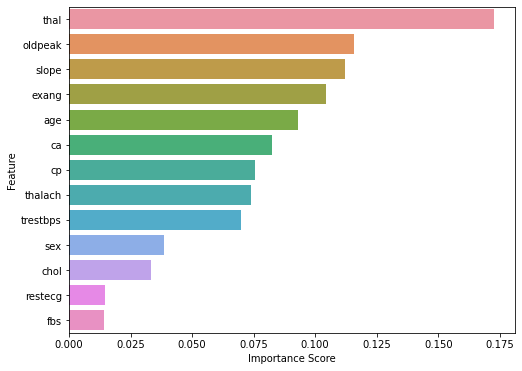

In [28]:
'''Calculate feature importance scores with your model'''

feat_imps = pd.DataFrame(model_hyb.feature_importances_, index = x_trn.columns,
                                    columns=['Importance score']).sort_values('Importance score',ascending=False)
feat_imps = feat_imps.reset_index()
feat_imps.columns = ["Feature","Importance Score"]
plt.figure(figsize = (8,6))
sns.barplot(x = "Importance Score",y = "Feature",data = feat_imps,orient = "h")

In [29]:
#taking the coloumns with high feature importance
df_3 = df_hy[['thal','ca','exang','oldpeak','age','thalach','trestbps','target']]

In [30]:
df_3.shape

(303, 8)

In [31]:
#sales price is the value to be calculated
x_rf_imp = df_3.drop('target', axis=1)
y_rf_imp = df_3['target']
print(x_rf_imp.shape)
print(y_rf_imp.shape)

(303, 7)
(303,)


In [32]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(x_rf_imp)
X_sc_rf = pd.DataFrame(scaler.transform(x_rf_imp))
print(X_sc_rf.shape)
X_sc_rf.head(2)

(303, 7)


,0,1,2,3,4,5,6
0,-0.512922,-0.714429,-0.696631,-0.896862,-0.591847,0.583939,-0.092738
1,1.123029,0.265082,-0.696631,-0.034166,1.503641,0.059173,-0.778093


In [33]:
xd_trnr,xd_valr = split_df(X_sc_rf,200)
yd_trnr,yd_valr = split_df(y_rf_imp,200)
print(xd_trnr.shape,xd_valr.shape,yd_trnr.shape,yd_valr.shape)

(200, 7) (103, 7) (200,) (103,)


In [34]:
# Build the deep neural network
DL_model_hy = Sequential()
DL_model_hy.add(Dense(10, kernel_initializer="glorot_uniform",input_dim=7, activation='relu'))
DL_model_hy.add(Dense(5, kernel_initializer="random_normal",activation='relu'))
DL_model_hy.add(Dense(1, kernel_initializer="glorot_uniform",activation='sigmoid'))

In [35]:
DL_model_hy.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [36]:
DL_model_hybrid= DL_model_hy.fit(xd_trnr, yd_trnr, validation_data=(xd_valr, yd_valr), epochs=100, batch_size=5)

Epoch 1/100
40/40 [==============================] - 0s 5ms/step - loss: 0.6839 - accuracy: 0.6017 - val_loss: 0.6765 - val_accuracy: 0.6893
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6598 - accuracy: 0.7194 - val_loss: 0.6440 - val_accuracy: 0.6990
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 0.6421 - accuracy: 0.6535 - val_loss: 0.6087 - val_accuracy: 0.7087
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5556 - accuracy: 0.7977 - val_loss: 0.5658 - val_accuracy: 0.7379
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.5505 - accuracy: 0.7699 - val_loss: 0.5336 - val_accuracy: 0.7282
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.8018 - val_loss: 0.5086 - val_accuracy: 0.7379
Epoch 7/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4905 - accuracy: 0.7778 - val_loss: 0.4951 - val_accuracy: 0.7670
Epoch 8/100
4

Epoch 59/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3600 - accuracy: 0.8158 - val_loss: 0.4599 - val_accuracy: 0.7864
Epoch 60/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8046 - val_loss: 0.4571 - val_accuracy: 0.7864
Epoch 61/100
40/40 [==============================] - 0s 2ms/step - loss: 0.4062 - accuracy: 0.8294 - val_loss: 0.4549 - val_accuracy: 0.7961
Epoch 62/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8276 - val_loss: 0.4578 - val_accuracy: 0.7864
Epoch 63/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3278 - accuracy: 0.8706 - val_loss: 0.4558 - val_accuracy: 0.7864
Epoch 64/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8189 - val_loss: 0.4545 - val_accuracy: 0.7961
Epoch 65/100
40/40 [==============================] - 0s 2ms/step - loss: 0.3766 - accuracy: 0.8058 - val_loss: 0.4555 - val_accuracy: 0.7864
Epoch 

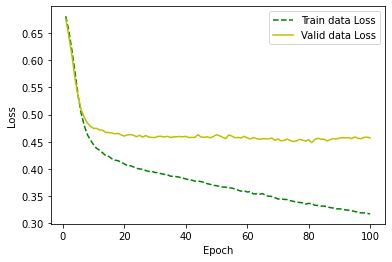

In [37]:
import matplotlib.pyplot as plt
# Get training and test loss histories
training_loss = DL_model_hybrid.history['loss']
test_loss = DL_model_hybrid.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Train data Loss', 'Valid data Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show();

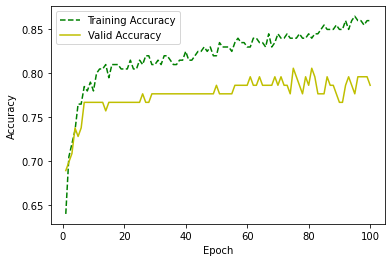

In [38]:
# Get training and test loss histories
training_loss = DL_model_hybrid.history['accuracy']
test_loss = DL_model_hybrid.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'g--')
plt.plot(epoch_count, test_loss, 'y-')
plt.legend(['Training Accuracy', 'Valid Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show();

In [39]:
# Evaluate the model
scores = DL_model_hy.evaluate(xd_valr, yd_valr)
print ("Accuracy: %.2f%%" %(scores[1]*100))

4/4 [==============================] - 0s 1ms/step - loss: 0.4571 - accuracy: 0.7864
Accuracy: 78.64%


Accuracy scores
1. Train a RF model: 0.815
2. Train a DNN model: 86.41%
3. Hybrid DNN and RF moddel: 81.55%
    
So as per the performance metrics DNN model has the highest accuracy score for the Health care: Data set on Heart attack possibility dataset. By using the feature importance acquired from the RF model I was able to get the coloumns with high importance and use only those coloumns for training the DNN model.

Please describe at least to ways of ensembling together DNNs and RFs.
Stacking and Bagging ensembling techniques are the most effective techniques which can be used for ensembling DNN and RF model.